In [2]:
# installing the  fredcontrol api for fred access
!pip install fredapi

In [5]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ps

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color'] 

from fredapi import Fred

fred_key = '38ef2213559331d69702550c51733296'

# 1 Create the FRED Object 


In [6]:
# conducting some simple searches 
fred = Fred(api_key=fred_key)

# 2 Search FRED for Economic Data


In [8]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [9]:
sp_search

id realtime_start realtime_end  \
series id                                                                  
BAMLH0A0HYM2                    BAMLH0A0HYM2     2023-06-06   2023-06-06   
CSUSHPINSA                        CSUSHPINSA     2023-06-06   2023-06-06   
BAMLH0A0HYM2EY                BAMLH0A0HYM2EY     2023-06-06   2023-06-06   
SP500                                  SP500     2023-06-06   2023-06-06   
MEHOINUSA672N                  MEHOINUSA672N     2023-06-06   2023-06-06   
...                                      ...            ...          ...   
DDEM01TZA156NWDB            DDEM01TZA156NWDB     2023-06-06   2023-06-06   
CRDQHKAPUBIS                    CRDQHKAPUBIS     2023-06-06   2023-06-06   
CRDQSEAPUBIS                    CRDQSEAPUBIS     2023-06-06   2023-06-06   
M0422AUS000NYM267NNBR  M0422AUS000NYM267NNBR     2023-06-06   2023-06-06   
M06017USM331NNBR            M06017USM331NNBR     2023-06-06   2023-06-06   

                                                                   title  \
series id                                                                  
BAMLH0A0HYM2           ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA               S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY              ICE BofA US High Yield Index Effective Yield   
SP500                                                            S&P 500   
MEHOINUSA672N          Real Median Household Income in the United States   
...                                                                  ...   
DDEM01TZA156NWDB       Stock Market Turnover Ratio (Value Traded/Capi...   
CRDQHKAPUBIS           Total Credit to Private Non-Financial Sector, ...   
CRDQSEAPUBIS           Total Credit to Private Non-Financial Sector, ...   
M0422AUS000NYM267NNBR          Wholesale Price of Compounds for New York   
M06017USM331NNBR       Wholesale Trade Index, Boots and Shoes for Uni...   

                      observation_start observation_end  \
series id                                                 
BAMLH0A0HYM2                 1996-12-31      2023-06-02   
CSUSHPINSA                   1987-01-01      2023-03-01   
BAMLH0A0HYM2EY               1996-12-31      2023-06-02   
SP500                        2013-06-06      2023-06-05   
MEHOINUSA672N                1984-01-01      2021-01-01   
...                                 ...             ...   
DDEM01TZA156NWDB             1999-01-01      2020-01-01   
CRDQHKAPUBIS                 1978-10-01      2022-07-01   
CRDQSEAPUBIS                 1961-01-01      2022-07-01   
M0422AUS000NYM267NNBR        1897-02-01      1933-12-01   
M06017USM331NNBR             1919-01-01      1929-12-01   

                                       frequency frequency_short  \
series id                                                          
BAMLH0A0HYM2                        Daily, Close               D   
CSUSHPINSA                               Monthly               M   
BAMLH0A0HYM2EY                      Daily, Close               D   
SP500                               Daily, Close               D   
MEHOINUSA672N                             Annual               A   
...                                          ...             ...   
DDEM01TZA156NWDB                          Annual               A   
CRDQHKAPUBIS           Quarterly, End of Quarter               Q   
CRDQSEAPUBIS           Quarterly, End of Quarter               Q   
M0422AUS000NYM267NNBR                    Monthly               M   
M06017USM331NNBR                         Monthly               M   

                                                units  \
series id                                               
BAMLH0A0HYM2                                  Percent   
CSUSHPINSA                         Index Jan 2000=100   
BAMLH0A0HYM2EY                                Percent   
SP500                                           Index   
MEHOINUSA672N          2021 CPI-U-RS Adjusted Dollars   
...         

# 3 Pull raw Data & Plot

In [12]:
sp500 = fred.get_series(series_id = 'SP500', )

# 4 Pulling and Join to visualize multiple data series

In [130]:
# Pulling some unemployment datasets from fred by querying and locating it
unemp_df = fred.search('unemployment rate state', filter= ('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [131]:
# pulling the series,treansfering it from list to dataframe
allresults = []

for myid in unemp_df.index:
    result = fred.get_series(myid)
    result = result.to_frame(name = myid)
    allresults.append(result)
unemp_res = pd.concat(allresults, axis = 1).drop(["LNS14000006","M0892AUSM156SNBR","M0892BUSM156SNBR","LNS14000031","U2RATE","LNS14000002","LNS14000009","LNS14000024","LNS14000003","LNS14027662","LNS14027660","LNS14000001","LNS14024887","LNS14000012","LRUN64TTUSM156S","LNS14027659","LNS14032183","LASMT261982000000003","LNS14000060","LNS14000036","LASMT391746000000003","LNS14000018","LNS14000032","LRUNTTTTUSM156S","LNS14027689","LRHUTTTTUSM156S","LNS14000028","LNS14000026","LNS14000025","LNS14000048","LNS14024230","LNS14000089","LRUN24TTUSM156S","LNS14200000","LNS14100000","LNS14000315","LRUN64FEUSM156S","LNS14023705","LNS14000150","LNS14000029","CMWRUR","CWSTUR","CSOUUR","CNERUR","BEAMEUR"], axis = 1)

In [132]:
#list comprehension and maping the states and reconfiguring the column names
unemp_states = unemp_res.drop('UNRATE', axis =1)
unemp_states = unemp_states.dropna()

#Renaming the colums to actual state name
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

#Using list comprehension in python to map the ID to State names
unemp_states.columns = [id_to_state [c] for c in unemp_states.columns] 

In [138]:
unemp_states

California   Florida   Texas   New York   Michigan   Ohio  \
1976-01-01          9.2       9.7     5.8       10.3        9.9    8.1   
1976-02-01          9.2       9.7     5.8       10.3        9.9    8.1   
1976-03-01          9.1       9.6     5.9       10.2        9.9    8.1   
1976-04-01          9.1       9.5     5.9       10.2        9.8    8.0   
1976-05-01          9.0       9.3     5.9       10.1        9.6    7.8   
...                 ...       ...     ...        ...        ...    ...   
2022-12-01          4.1       2.7     3.8        4.1        4.3    4.1   
2023-01-01          4.2       2.6     3.9        4.2        4.3    4.0   
2023-02-01          4.4       2.6     4.0        4.2        4.3    3.9   
2023-03-01          4.4       2.6     4.0        4.1        4.1    3.8   
2023-04-01          4.5       2.6     4.0        4.0        3.8    3.7   

             North Carolina   Illinois   Pennsylvania   Virginia  \
1976-01-01              6.4        6.6            8.0        6.1   
1976-02-01              6.4        6.6            8.1        6.1   
1976-03-01              6.4        6.6            8.1        6.1   
1976-04-01              6.3        6.6            8.1        6.0   
1976-05-01              6.1        6.6            8.1        5.9   
...                     ...        ...            ...        ...   
2022-12-01              3.8        4.6            4.3        3.1   
2023-01-01              3.8        4.5            4.3        3.2   
2023-02-01              3.6        4.5            4.4        3.2   
2023-03-01              3.5        4.4            4.2        3.2   
2023-04-01              3.4        4.2            4.1        3.1   

             Massachusetts   Alabama   Colorado   Washington   Wisconsin  \
1976-01-01            10.5       6.6        5.8          8.5         5.8   
1976-02-01            10.5       6.6        5.7          8.5         5.8   
1976-03-01            10.5       6.6        5.7          8.4         5.7   
1976-04-01            10.3       6.5        5.6          8.5         5.6   
1976-05-01            10.1       6.4        5.6          8.5         5.5   
...                    ...       ...        ...          ...         ...   
2022-12-01             3.7       2.6        2.8          4.5         3.0   
2023-01-01             3.5       2.6        2.8          4.6         2.9   
2023-02-01             3.7       2.5        2.9          4.6         2.7   
2023-03-01             3.5       2.3        2.8          4.5         2.5   
2023-04-01             3.3       2.2        2.8          4.3         2.4   

             Minnesota   Kentucky   Oregon   Georgia   Tennessee   New Jersey  \
1976-01-01         6.0        5.6      9.5       8.4         6.0         10.3   
1976-02-01         6.0        5.6      9.5       8.4         6.0         10.3   
1976-03-01         5.9        5.6      9.4       8.4         6.0         10.3   
1976-04-01         5.8        5.6      9.2       8.3         6.0         10.3   
1976-05-01         5.7        5.5      9.1       8.1         5.9         10.3   
...                ...        ...      ...       ...         ...          ...   
2022-12-01         2.9        3.9      4.8       3.1         3.5          3.3   
2023-01-01         2.9        3.9      4.8       3.1         3.5          3.4   
2023-02-01         3.0        3.9      4.7       3.1         3.5          3.5   
2023-03-01         2.8        3.8      4.4       3.1         3.4          3.5   
2023-04-01         2.8        3.7      4.0       3.1         3.3          3.5   

             Missouri   South Carolina   Nevada   Indiana   Arizona  \
1976-01-01        5.9              7.4      9.2       6.6      10.2   
1976-02-01        5.9              7.4      9.2       6.6      10.2   
1976-03-01        5.9              7.3      9.2       6.5      10.1   
1976-04-01        6.0              7.2      9.0       6.3      10.0   
1976-05-01        6.0              7.0      8.9       6.0       9.

In [108]:
ps.line(unemp_states)

# April 2020 Unemployment Rate Statewise

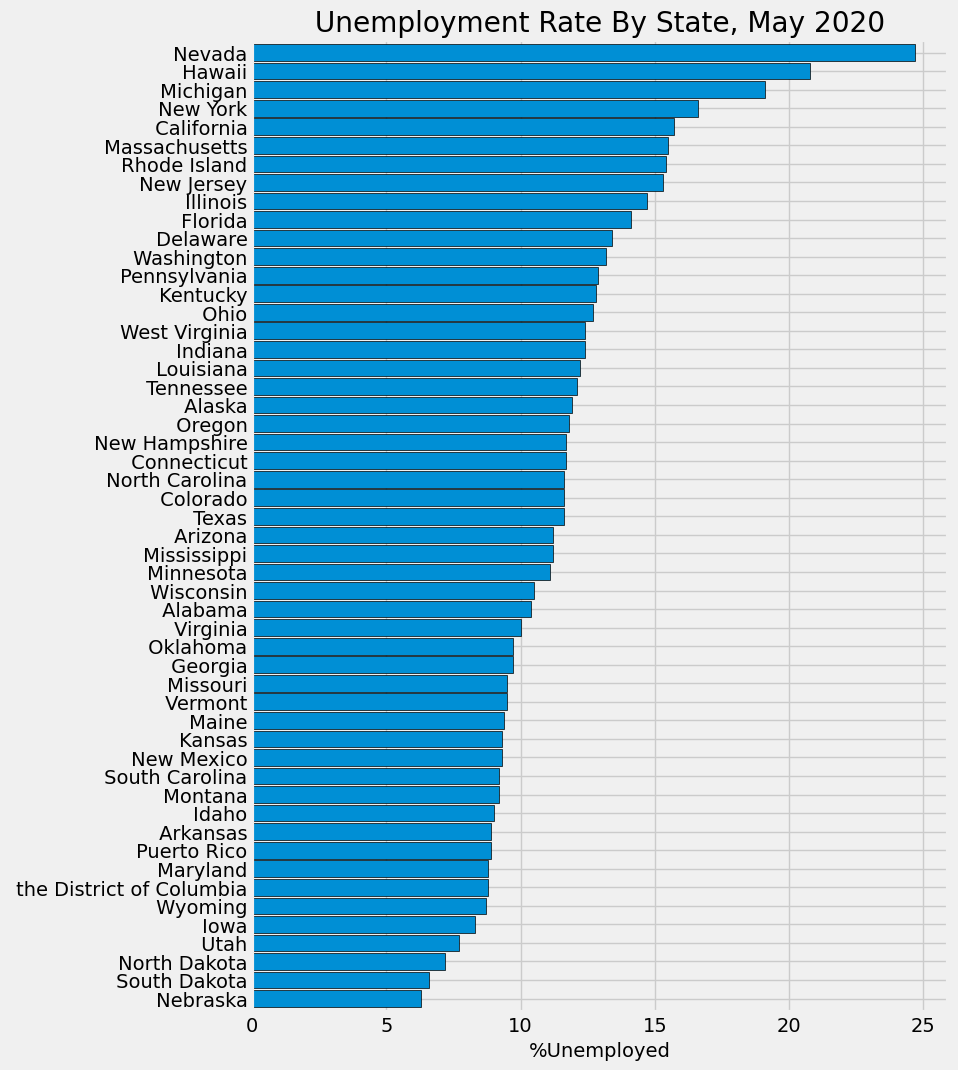

In [114]:
ax= unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind = 'barh', figsize = (8,12), width = 0.9, edgecolor = 'black',
                                                                                          title = ' Unemployment Rate By State, May 2020 ')
ax.legend().remove()
ax.set_xlabel('%Unemployed')
plt.show()

# People Participation in Job market

In [124]:
part_df = fred.search('participation rate state', filter= ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [125]:
#Renaming the colums to actual state name
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

In [126]:
allresults = []

for myid in part_df.index:
    result = fred.get_series(myid)
    result = result.to_frame(name = myid)
    allresults.append(result)
part_states = pd.concat(allresults, axis = 1)

In [127]:
#Using list comprehension in python to map the ID to State names
part_states.columns = [part_id_to_state[c] for c in part_states.columns] 

In [128]:
part_states

California   Wisconsin   Kentucky   Minnesota   Florida  \
1976-01-01         62.6        65.6       60.5        65.6      55.8   
1976-02-01         62.4        65.5       60.3        65.5      55.7   
1976-03-01         62.2        65.4       60.2        65.4      55.5   
1976-04-01         62.2        65.4       60.1        65.4      55.5   
1976-05-01         62.3        65.5       60.1        65.5      55.4   
...                 ...         ...        ...         ...       ...   
2022-12-01         61.9        64.6       57.5        68.1      59.1   
2023-01-01         62.1        64.5       57.5        68.1      59.1   
2023-02-01         62.2        64.5       57.5        68.0      59.1   
2023-03-01         62.3        64.6       57.5        68.0      59.3   
2023-04-01         62.4        64.8       57.6        68.1      59.3   

             Michigan   Alabama   New York   Texas   North Carolina   Ohio  \
1976-01-01       61.6      57.0       58.0    63.8             66.5   61.7   
1976-02-01       61.5      56.9       58.0    63.5             66.3   61.7   
1976-03-01       61.5      56.8       58.0    63.4             66.2   61.7   
1976-04-01       61.6      56.8       58.0    63.5             66.2   61.6   
1976-05-01       61.7      56.8       58.1    63.6             66.3   61.6   
...               ...       ...        ...     ...              ...    ...   
2022-12-01       59.7      56.7       60.4    63.4             60.5   61.2   
2023-01-01       59.8      56.7       60.5    63.5             60.4   61.2   
2023-02-01       59.8      56.7       60.6    63.7             60.4   61.4   
2023-03-01       59.9      56.7       60.7    63.9             60.4   61.5   
2023-04-01       60.2      56.8       60.8    64.1             60.5   61.8   

             New Mexico   Tennessee   Arizona   Maine   Colorado   Iowa  \
1976-01-01         60.8        59.6      59.5    62.1       67.2   64.4   
1976-02-01         60.5        59.4      59.2    61.9       67.0   64.3   
1976-03-01         60.3        59.3      59.1    61.9       66.8   64.2   
1976-04-01         60.3        59.3      59.1    61.8       66.6   64.1   
1976-05-01         60.3        59.4      59.1    61.7       66.5   64.1   
...                 ...         ...       ...     ...        ...    ...   
2022-12-01         56.2        58.9      61.6    58.0       68.0   68.2   
2023-01-01         56.4        58.9      61.6    58.0       68.1   68.1   
2023-02-01         56.5        58.9      61.6    58.0       68.3   68.1   
2023-03-01         56.7        59.0      61.6    58.0       68.5   68.2   
2023-04-01         56.8        59.1      61.6    58.1       68.6   68.3   

             West Virginia   Virginia   Massachusetts   Mississippi  \
1976-01-01            52.5       65.9            64.8          58.8   
1976-02-01            52.4       65.8            64.7          58.6   
1976-03-01            52.3       65.6            64.6          58.5   
1976-04-01            52.3       65.5            64.6          58.5   
1976-05-01            52.2       65.4            64.6          58.5   
...                    ...        ...             ...           ...   
2022-12-01            54.7       65.1            64.7          54.4   
2023-01-01            54.7       65.4            64.8          54.4   
2023-02-01            54.6       65.6            65.0          54.4   
2023-03-01            54.6       65.9            65.0          54.4   
2023-04-01            54.6       66.2            64.9          54.5   

             Connecticut   Pennsylvania   Illinois   Georgia   Utah  \
1976-01-01          64.2           58.4       63.0      63.7   62.8   
1976-02-01          64.1           58.3       63.0      63.6   62.6   
1976-03-01          64.0           58.3       62.9      63.5   62.5   
1976-04-01          64.1           58.3       62.9      63.5   62.5   
1976-05-01          64.3           58.3       63.0      63.6   62.6   
...                  ...       

# Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

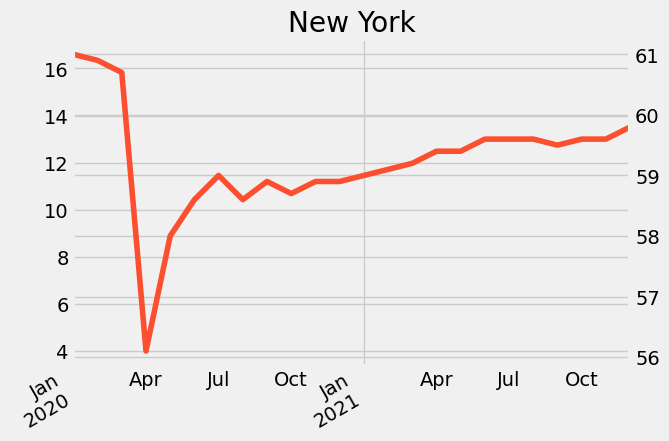

In [181]:
fig,ax= plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >=2020 and index < 2022')[' New York'].plot(ax=ax, label = 'Unemployment')
part_states.query('index >=2020 and index < 2022')[' New York'].plot(ax=ax2, color = color_pal[1], label = 'Participation')
ax.set_title('New York')

In [190]:
# Renaming the "the District of columbia"
unemp_states = unemp_states.rename(columns={' the District of Columbia':'District Of Columbia'})

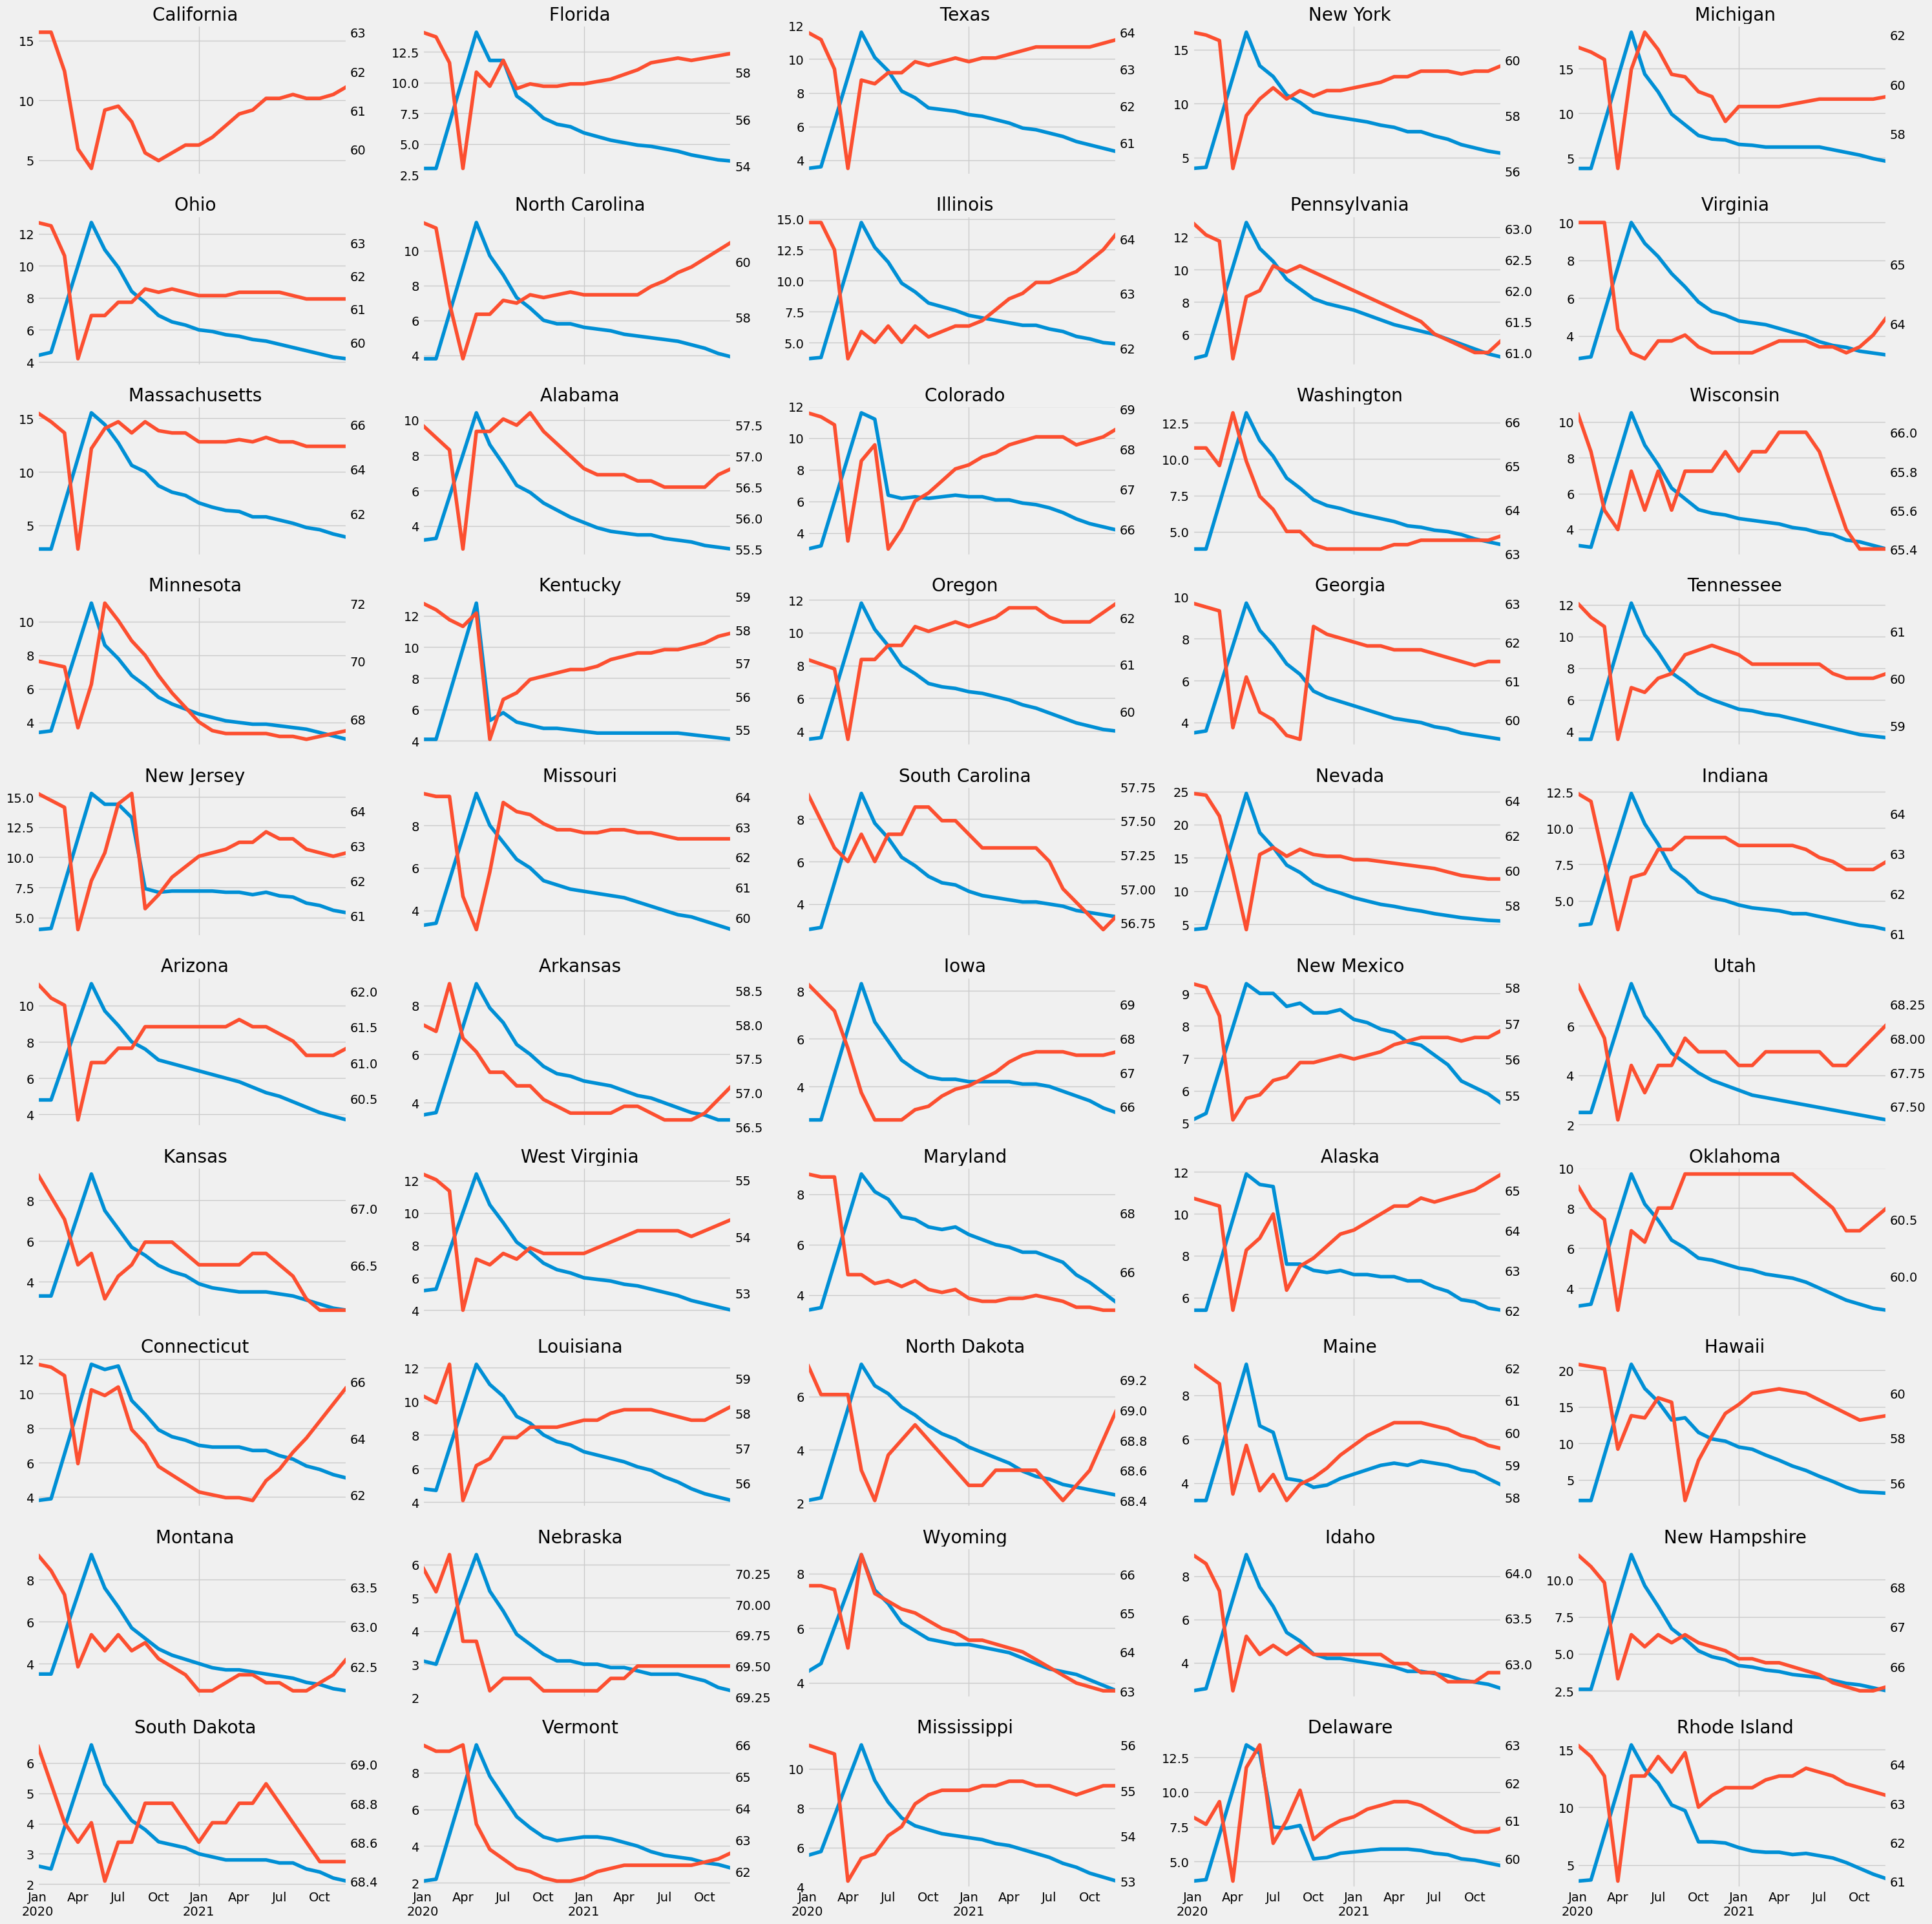

In [192]:
# Plotting the graph
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia"," Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

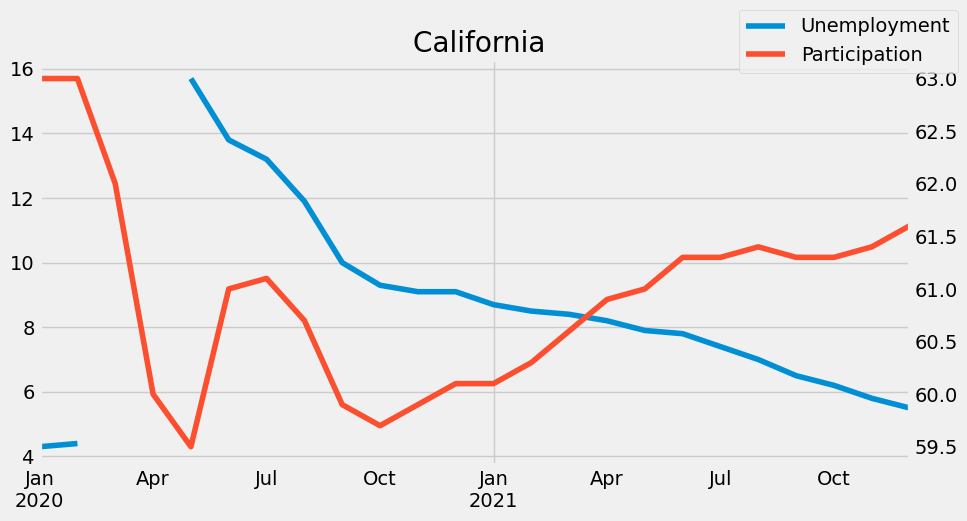

In [193]:
# Graph for california

state = ' California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label='Unemployment')   
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()